In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
movies = pd.read_csv('./ml-25m/movies.csv', sep=',')
genome_tags = pd.read_csv('./ml-25m/genome-tags.csv', sep=',')
genome_scores = pd.read_csv('./ml-25m/genome-scores.csv', sep=',')
tags = pd.read_csv('./ml-25m/tags.csv', sep=',').drop('timestamp', axis=1)
ratings = pd.read_csv('./ml-25m/ratings.csv', sep=',').drop('timestamp', axis=1)

<AxesSubplot:xlabel='rating', ylabel='Count'>

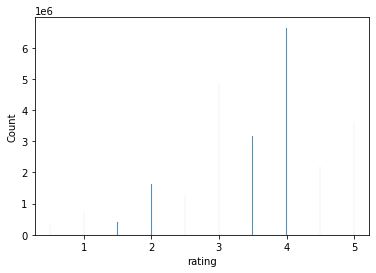

In [3]:
sns.histplot(ratings['rating'])

In [4]:
genres=[]
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        if x not in genres:
            genres.append(x)  

len(genres)
for x in genres:
    movies[x] = 0
for i in range(len(movies.genres)):
    for x in movies.genres[i].split('|'):
        movies[x][i]=1

<ipython-input-4-35f8ec8f8bb8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[x][i]=1


In [5]:
movies.drop(columns='genres',  inplace=True)
movies.sort_index(inplace=True)

In [7]:
movies.to_csv('./csv_genereted/movies_genre.csv', index = False)

In [8]:
rating_mean = ratings.groupby(['movieId']).mean()

In [9]:
rating_mean = rating_mean.drop(columns=['userId'])

In [10]:
rating_mean.to_csv('./csv_genereted/mean_rating.csv', index = True)

In [11]:
movieIds = genome_scores.groupby('movieId')

In [12]:
tag_columns = []
for  i in range(len(genome_tags)):
    tag_columns.append(genome_tags.iloc[i, 0])

In [13]:
tag_relevance_movies = pd.DataFrame({
    'movieId': movieIds.groups.keys()
})

y = len(tag_relevance_movies.columns)
for i in range(len(tag_columns)):
    tag_relevance_movies.insert(y, tag_columns[i], "")
    y += 1

In [14]:
for i in range(len(tag_relevance_movies.movieId)):
    x = movieIds.get_group(tag_relevance_movies.iloc[i, 0])
    z = np.array(x.relevance)
    tag_relevance_movies.iloc[i, 1:] = z[:]

In [ ]:
tag_relevance_movies.to_csv('./csv_genereted/movies_tag_relevance.csv', index=False)